## Feature Scaling

We discussed previously that the scale of the features is an important consideration when building machine learning models. Briefly:


### Feature magnitude matters because:

- The regression coefficients of linear models are directly influenced by the scale of the variable.
- Variables with bigger magnitude / larger value range dominate over those with smaller magnitude / value range
- Gradient descent converges faster when features are on similar scales
- Feature scaling helps decrease the time to find support vectors for SVMs
- Euclidean distances are sensitive to feature magnitude.
- Some algorithms, like PCA require the features to be centered at 0.


### The machine learning models affected by the feature scale are:

- Linear and Logistic Regression
- Neural Networks
- Support Vector Machines
- KNN
- K-means clustering
- Linear Discriminant Analysis (LDA)
- Principal Component Analysis (PCA)


### Feature Scaling

**Feature scaling** refers to the methods or techniques used to normalize the range of independent variables in our data, or in other words, the methods to set the feature value range within a similar scale. Feature scaling is generally the last step in the data preprocessing pipeline, performed **just before training the machine learning algorithms**.

There are several Feature Scaling techniques, which we will discuss throughout this section:

- Standardisation
- Mean normalisation
- Scaling to minimum and maximum values - MinMaxScaling
- Scaling to maximum value - MaxAbsScaling
- Scaling to quantiles and median - RobustScaling
- Normalization to vector unit length

In this notebook, we will discuss **Maximum Absolute Scaling**,**RobustScaling**,**Normalization to vector unit length**.

=================================================================

## Scaling to maximum value - MaxAbsScaling

Maximum absolute scaling scales the data to its maximum value:

X_scaled = X / X.max

The result of the above transformation is a distribution which values vary within the range of -1 to 1. But the mean is not centered at zero and the standard deviation varies across variables.

Scikit-learn suggests that this transformer is meant for data that is centered at zero, and for sparse data.


In a nutshell, MaxAbsScaling:

- does not center the mean at 0 (but it might be a good idea t center it with another method)
- variance varies across variables
- may not preserve the shape of the original distribution
- sensitive outliers


## In this demo

We will perform scaling to the maximum value using the Boston House Prices data set that comes with Scikit-learn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# dataset for the demo
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# the scaler - for MaxAbsScaling, with centering
from sklearn.preprocessing import MaxAbsScaler, StandardScaler

In [2]:
# load the the Boston House price data

# this is how we load the boston dataset from sklearn
# The Boston Housing Dataset is a derived from information collected by the U.S. 
# Census Service concerning housing in the area of Boston MA.
# https://scikit-learn.org/stable/modules/classes.html
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# add target MEDV - Median value of owner-occupied homes in $1000's
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
data['MEDV'] = boston_dataset.target

# retrieve 1st 5 rows
data.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


In [3]:
# Information about the boston house prince dataset
# you will find details about the different variables

# the aim is to predict the "Median value of the houses"
# MEDV column in this dataset

# and there are variables with characteristics about
# the homes and the neighborhoods

# print the dataset description
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
# print(boston_dataset.DESCR)

In [4]:
# let's have a look at the main statistical parameters of the variables
# to get an idea of the feature magnitudes
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


The different variables present different value ranges, mean, max, min, standard deviations, etc. In other words, they show different magnitudes or scales. Note for this demo, how **the maximum values are are quite different in the different variables**.

When performing maximum absolute scaling on the data set, we need to first identify the maximum values of the variables. These parameters need to be learned from the train set, stored, and then used to scale test and future data. Thus, we will first divide the data set into train and test, as we have done throughout the course.

In [5]:
# let's separate the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1),
                                                    data['MEDV'],
                                                    test_size=0.3,
                                                    random_state=0)

# Get dimensions of X_train and X_test
X_train.shape, X_test.shape

((354, 13), (152, 13))

### MaxAbsScaling

The MaxAbsScaler from scikit-learn re-scales features to their maximum value, so that the new maximum value is 1. 

In [6]:
# set up the scaler
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html
scaler = MaxAbsScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# the scaler stores the maximum values of the features as learned from train set
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html
scaler.max_abs_

array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        36.98  ])

In [8]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [9]:
# let's have a look at the original training dataset: maximum values
# Use np.round to reduce the number of decimals to 1.

# np.round(X_train.describe(), 1)

In [10]:
# let's have a look at the scaled training dataset: maximum values
# Use np.round to reduce the number of decimals to 1.

# np.round(X_train_scaled.describe(), 1)

The maximum values are re-scaled to 1. Every other parameter, changes across variables.

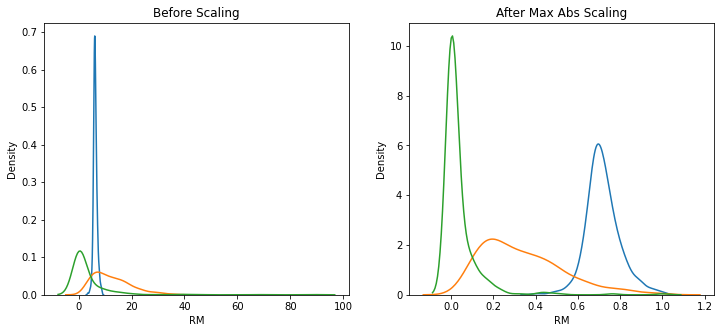

In [11]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling using kdeplot
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# after scaling using kdeplot
ax2.set_title('After Max Abs Scaling')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

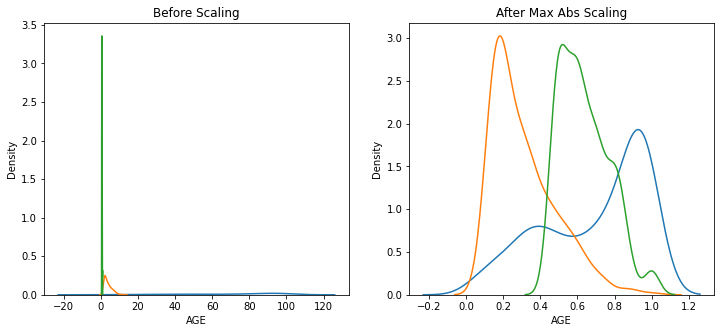

In [12]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling using kdeplot
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# after scaling using kdeplot
ax2.set_title('After Max Abs Scaling')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

## Centering + MaxAbsScaling

We can center the distributions at zero and then scale to its absolute maximum, as recommended by Scikit-learn by combining the use of 2 transformers.

In [13]:
# set up the StandardScaler so that it removes the mean
# but does not divide by the standard deviation
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaler_mean = StandardScaler(with_mean=True, with_std=False)

# set up the MaxAbsScaler normally
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html
scaler_maxabs = MaxAbsScaler()

# fit the scalers to the train set, it will learn the parameters
scaler_mean.fit(X_train)
scaler_maxabs.fit(X_train)

# transform both scaler_maxabs and scaler_mean train and test sets
X_train_scaled = scaler_maxabs.transform(scaler_mean.transform(X_train))
X_test_scaled = scaler_maxabs.transform(scaler_mean.transform(X_test))

In [14]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

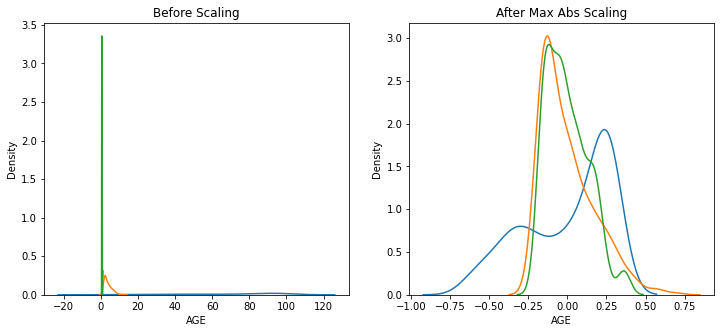

In [15]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling using kdeplot
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# after scaling using kdeplot
ax2.set_title('After Max Abs Scaling')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

Similar effect to mean normalisation, but in this case, the values vary across a narrower range. 

## Scaling to quantiles and median - RobustScaling

In this procedure the median is removed from the observations and then they are scaled to the inter-quantile range (IQR). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

X_scaled = X - X_median / ( X.quantile(0.75) - X.quantile(0.25) )

This robust scaling method produces more robust estimates for the center and range of the variable, and is recommended if the data shows outliers.

In a nutshell, RobustScaling:

- centers the median at 0
- variance varies across variables
- may not preserve the shape of the original distribution
- the minimum and maximum values vary.
- robust outliers



In [16]:
# let's separate the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1),
                                                    data['MEDV'],
                                                    test_size=0.3,
                                                    random_state=0)

# Get dimensions of X_train and X_test
X_train.shape, X_test.shape

((354, 13), (152, 13))

### RobustScaling

The MaxAbsScaler from scikit-learn re-scales features to their maximum value, so that the new maximum value is 1. 

In [17]:
# set up the scaler
from sklearn.preprocessing import RobustScaler
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html
scaler = RobustScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# the scaler stores the median values of the features as learned from train set
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html
scaler.center_

array([2.62660e-01, 0.00000e+00, 8.56000e+00, 0.00000e+00, 5.38000e-01,
       6.21550e+00, 7.94500e+01, 3.21570e+00, 5.00000e+00, 3.11000e+02,
       1.91000e+01, 3.91605e+02, 1.11600e+01])

In [19]:
# the scaler stores the IQR values of the features as learned from train set
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html
scaler.scale_

array([3.030275e+00, 2.000000e+01, 1.315000e+01, 1.000000e+00,
       1.792500e-01, 7.520000e-01, 4.857500e+01, 2.971650e+00,
       2.000000e+01, 3.900000e+02, 2.800000e+00, 1.963250e+01,
       9.982500e+00])

In [20]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [24]:
# let's have a look at the original training dataset: median values
# Use np.round to reduce the number of decimals to 1.

# np.round(X_train.median(), 1)

In [25]:
# let's have a look at the scaled training dataset: median values
# I use np.round to reduce the number of decimals to 1.

# np.round(X_train_scaled.median(), 1)

The variables were centered to the median values.

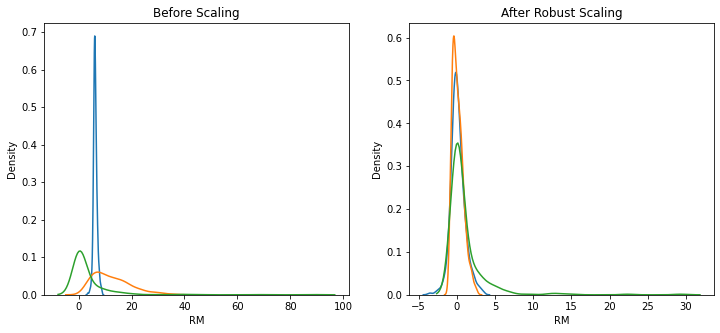

In [26]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling using kdeplot
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# after scaling using kdeplot
ax2.set_title('After Robust Scaling')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

The median of the distributions are centered at zero, but every other parameter may vary in the different variables. It does, though, squeeze the value range in the original variables, particularly for those highly skewed, like CRIM.

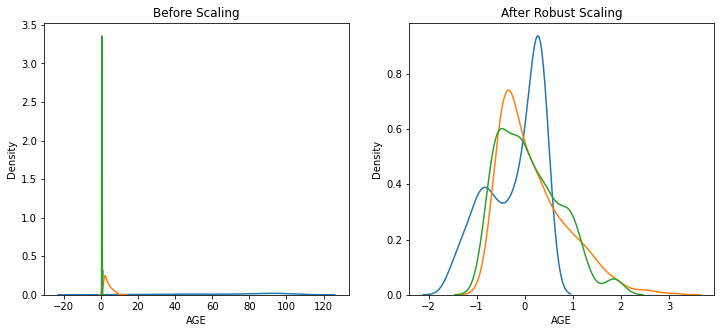

In [27]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling using kdeplot
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# after scaling using kdeplot
ax2.set_title('After Robust Scaling')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

Compare this scaling with mean normalisation, to see how this procedure affects the distribution shape.

## Scaling to vector unit  length / unit norm

In this procedure we scale the components of a feature vector such that the complete vector has a length of 1 or, in other words a norm of 1. **Note** that this normalisation procedure normalises the **feature** vector, and not the **observation** vector. So we divide by the norm of the feature vector, observation per observation, across the different variables, and not by the norm of the **observation** vector, across observations for the same feature.

First, let me give you the formulas, and then I illustrate with an example.

### Scaling to unit norm, formulas

Scaling to unit norm is achieved by dividing each feature vector by either the Manhattan distance (l1 norm) or the Euclidean distance of the vector (l2 norm):

X_scaled_l1 = X / l1(X)

X_scaled_l2 = X / l2(X)


The **Manhattan distance** is given by the sum of the absolute components of the vector:

l1(X) = |x1| + |x2| + ... + |xn|


Whereas the **Euclidean distance** is given by the square root of the square sum of the component of the vector:

l2(X) = sqr( x1^2 + x2^2 + ... + xn^2 )


In the above example, x1 is variable 1, x2 variable 2, and xn variable n, and X is the data for 1 observation across variables (a row in other words).

**Note** as well that as the euclidean distance squares the values of the feature vector components, outliers have a heavier weight. With outliers, we may prefer to use l1 normalisation.


### Scaling to unit norm, examples

For example, if our data has 1 observations (1 row) and 3 variables:

- number of pets
- number of children
- age

The values for each variable for that single observation are 10, 15 and 20. Our vector X = [10, 15, 20]. Then:

l1(X) = 10 + 15 + 20 = 45

l2(X) = sqr( 10^2 + 15^2 + 20^2) = sqr( 100 + 225 + 400) = **26.9**

The euclidean distance is always smaller than the manhattan distance.


The normalised vector values are therefore:

X_scaled_l1 = [ 10/45, 15/45, 20/45 ]      =  [0.22, 0.33, 0.44]

X_scaled_l2 = [10/26.9, 15/26.9, 20/26.9 ] =  [0.37, 0.55, 0.74]


Scikit-learn recommends this scaling procedures for text classification or clustering. For example, they quote the dot product of two l2-normalized TF-IDF vectors is the cosine similarity of the vectors and is the base similarity metric for the Vector Space Model commonly used by the Information Retrieval community.


In [28]:
# let's separate the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1),
                                                    data['MEDV'],
                                                    test_size=0.3,
                                                    random_state=0)

# Get dimensions of X_train and X_test
X_train.shape, X_test.shape

((354, 13), (152, 13))

### Scaling to l1

In [29]:
# set up the scaler
from sklearn.preprocessing import Normalizer
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html
scaler = Normalizer(norm='l1')

# fit the scaler, this procedure does NOTHING
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# let's calculate the norm for each observation (feature vector)
# original data
# using linear algebra https://numpy.org/doc/stable/reference/routines.linalg.html

# np.round( np.linalg.norm(X_train, ord=1, axis=1), 1)

In [32]:
# let's calculate the norm for each observation (feature vector)
# scaled data
# # using np.round and linear algebra https://numpy.org/doc/stable/reference/routines.linalg.html
# np.round( np.linalg.norm(X_train_scaled, ord=1, axis=1), 1)

Now, each feature vector has a l1 norm of 1.

In [38]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [33]:
# let's look at the individual values of the variables in the original data
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

# X_train.describe()

In [34]:
# let's look at the individual values of the variables in the scaled data
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

# X_train_scaled.describe()

The values have been squeezed in a smaller value range.

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

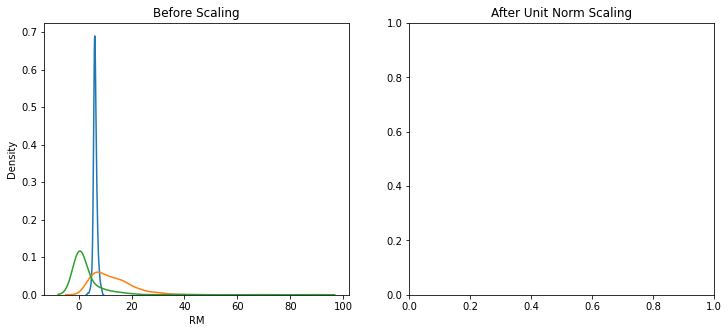

In [35]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling using kdeplot
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# after scaling using kdeplot
ax2.set_title('After Unit Norm Scaling')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

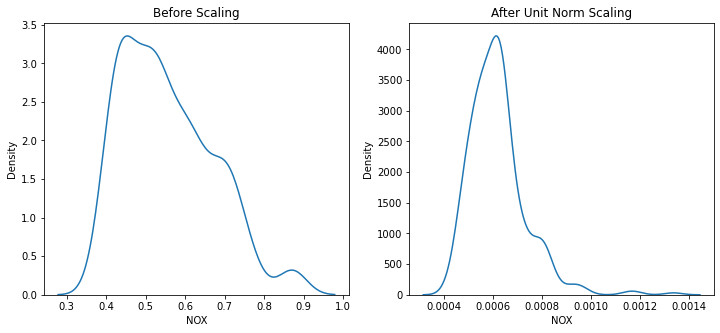

In [42]:
# let's compare the variable distributions before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling using kdeplot
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['NOX'], ax=ax1)

# after scaling using kdeplot
ax2.set_title('After Unit Norm Scaling')
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

See how this normalisation changes the distribution of the original variable quite dramatically. Go ahead and comment in an out the different variables to have a better look.

### Scaling to l2

In [43]:
# set up the scaler
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html
scaler = Normalizer(norm='l2')

# fit the scaler, this procedure does NOTHING
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# let's calculate the norm for each observation (feature vector)
# original data
# # using np.round and linear algebra https://numpy.org/doc/stable/reference/routines.linalg.html
# np.round( np.linalg.norm(X_train, ord=2, axis=1), 1)

In [37]:
# let's calculate the norm for each observation (feature vector)
# scaled data
# # using np.round and linear algebra https://numpy.org/doc/stable/reference/routines.linalg.html
# np.round( np.linalg.norm(X_train_scaled, ord=2, axis=1), 1)

In [38]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [39]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
# original data

# X_train.describe()

In [40]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
# scaled data

# X_train_scaled.describe()

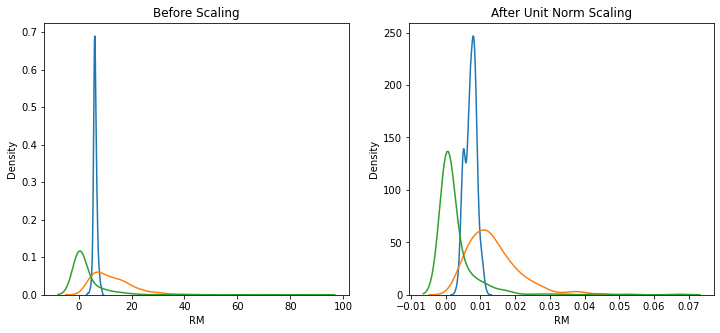

In [41]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling using kdeplot
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# after scaling using kdeplot
ax2.set_title('After Unit Norm Scaling')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

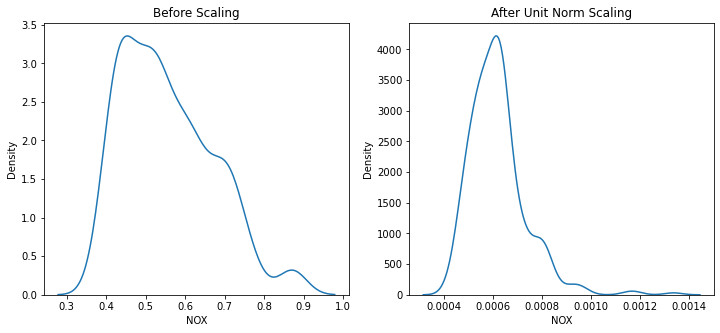

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling using kdeplot
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['NOX'], ax=ax1)

# after scaling using kdeplot
ax2.set_title('After Unit Norm Scaling')
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

In [52]:
print("ABDELMAKSOUD")

ABDELMAKSOUD
